# Dot Plots
## a generic and basic example
### two sequences that have a predetermined, optimal alignment, no gaps
create a matrix with each sequence as an axis
place a 0 if there is a mismatch between the two sequences at that position
place a 1 if there is a match
visualize matrix by coloring a grid according to 1's or 0's
here 1's are yellow, 0's are purple

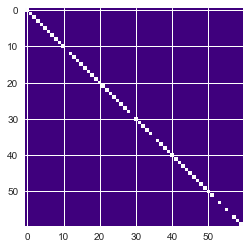

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
sequence_1 = 'gctagctagtagcttaggatgatcgtacgtagctagctgattatagagagagaaggagaa'
sequence_2 = 'gctagctagtaccttaggatgatcgtacgaagctaactgattatagagagagcaagcgaa'
dot_matrix = np.zeros((len(sequence_1),len(sequence_2)))
for base in range(0,len(sequence_1)):
    if sequence_1[base] == sequence_2[base]:
        dot_matrix[base,base] = 1
plt.imshow(dot_matrix,cmap="Purples_r",interpolation='none')        
plt.show()

above example is not particularly flexible



## scanning for different alignments

In [77]:
def dot_plot(seq_record,comparison_sequence,complement=True,window=3):
    #subject_strand = str(seq_record.seq).upper()
    subject_strand = seq_record
    #seq_two = str(comparison_sequence).upper()
    seq_two = comparison_sequence
    #seq_two_complement = str(comparison_sequence.complement).upper()
    data = np.array([[int((subject_strand[i:i + window] != seq_two[j:j + window]))
                       for i in range(len(subject_strand) - window)]
                      for j in range(len(seq_two) - window)])
    if complement==True:
        data = data + np.array([[2 * int((subject_strand[i:i + window] != seq_two_complement[j:j + window]))
                               for i in range(len(subject_strand) - window)]
                              for j in range(len(seq_two) - window)])
    return data

window size: 0
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


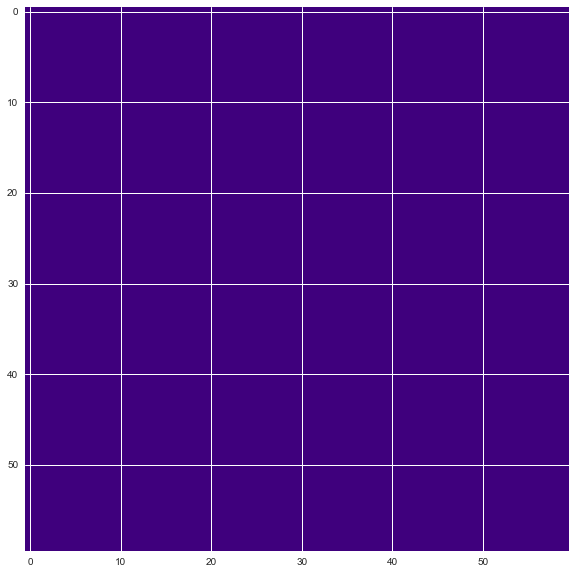

window size: 1
[[0 1 1 ..., 1 0 1]
 [1 0 1 ..., 1 1 1]
 [1 1 0 ..., 1 1 1]
 ..., 
 [1 0 1 ..., 1 1 1]
 [0 1 1 ..., 1 0 1]
 [1 1 1 ..., 0 1 0]]


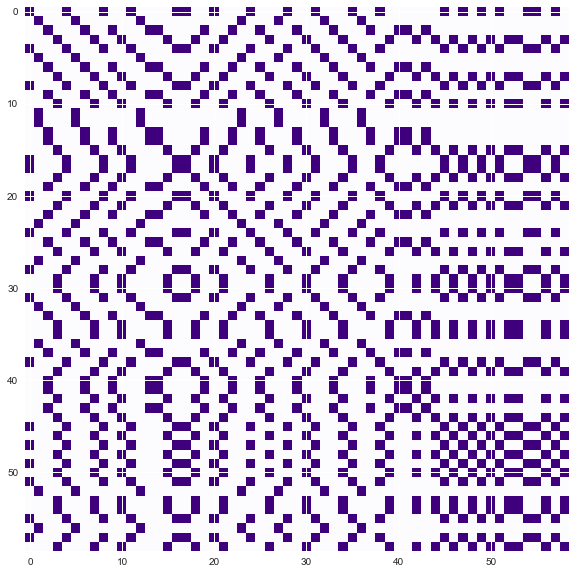

window size: 2
[[0 1 1 ..., 1 1 1]
 [1 0 1 ..., 1 1 1]
 [1 1 0 ..., 1 1 1]
 ..., 
 [0 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 0 1 0]]


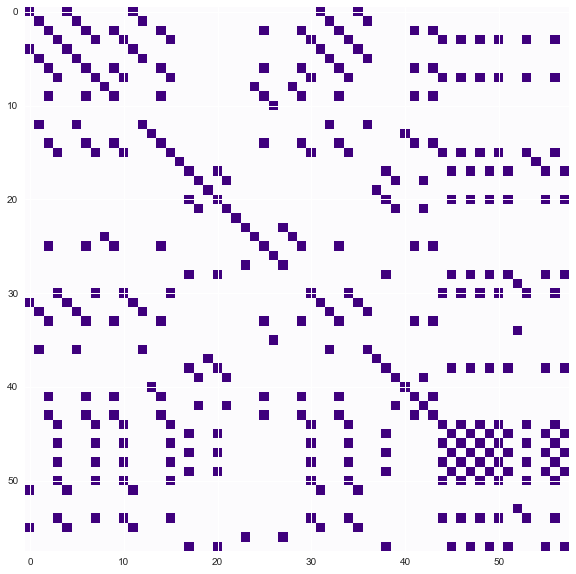

window size: 3
[[0 1 1 ..., 1 1 1]
 [1 0 1 ..., 1 1 1]
 [1 1 0 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]


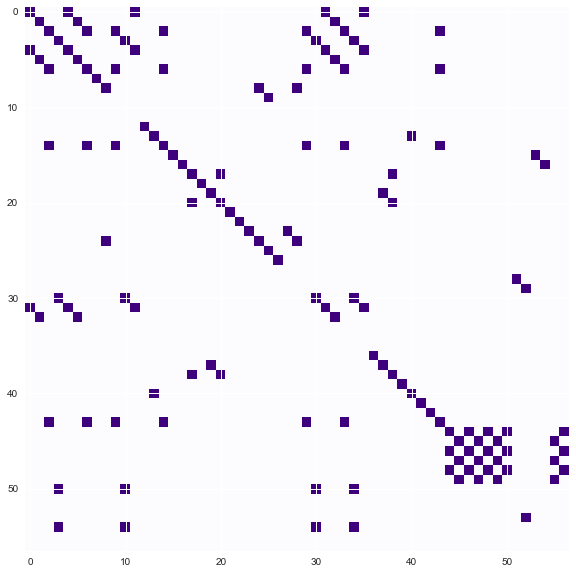

window size: 4
[[0 1 1 ..., 1 1 1]
 [1 0 1 ..., 1 1 1]
 [1 1 0 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]


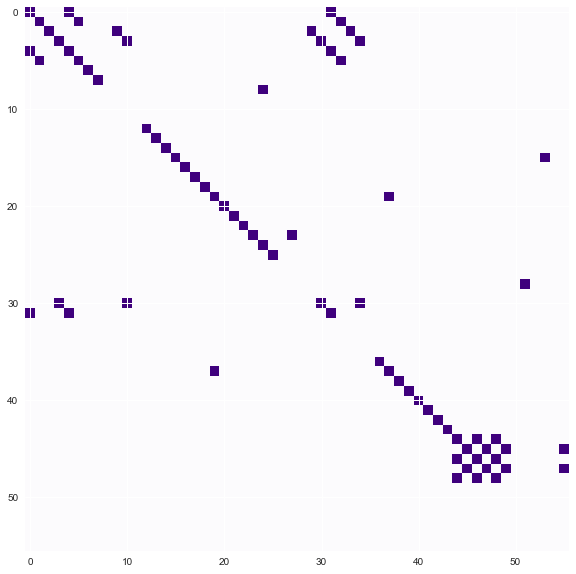

window size: 5
[[0 1 1 ..., 1 1 1]
 [1 0 1 ..., 1 1 1]
 [1 1 0 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]


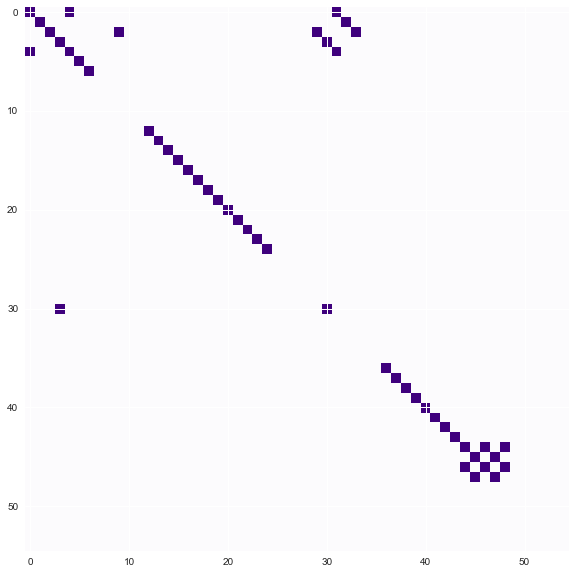

window size: 6
[[0 1 1 ..., 1 1 1]
 [1 0 1 ..., 1 1 1]
 [1 1 0 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]


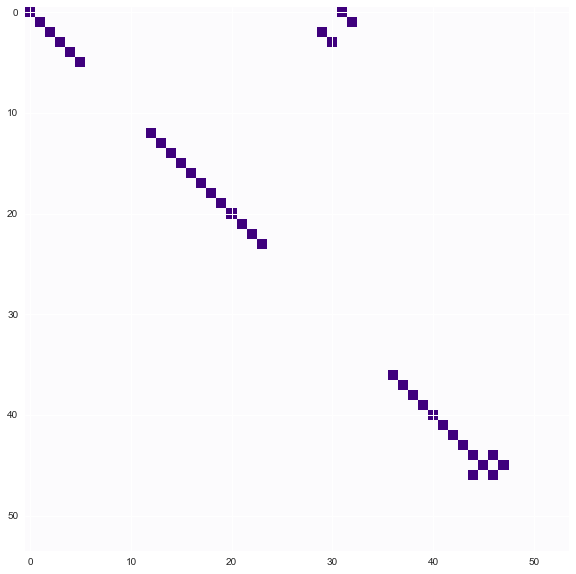

window size: 7
[[0 1 1 ..., 1 1 1]
 [1 0 1 ..., 1 1 1]
 [1 1 0 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]


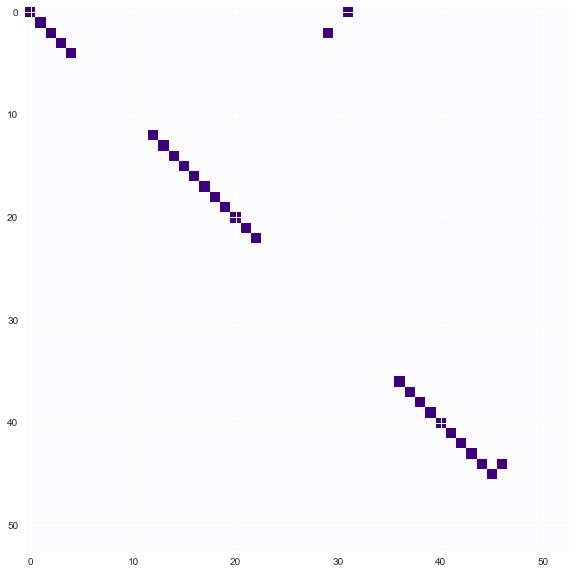

window size: 8
[[0 1 1 ..., 1 1 1]
 [1 0 1 ..., 1 1 1]
 [1 1 0 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]


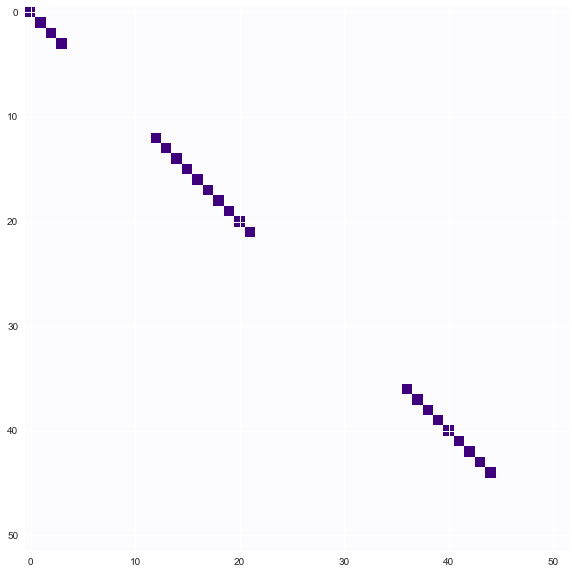

window size: 9
[[0 1 1 ..., 1 1 1]
 [1 0 1 ..., 1 1 1]
 [1 1 0 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]


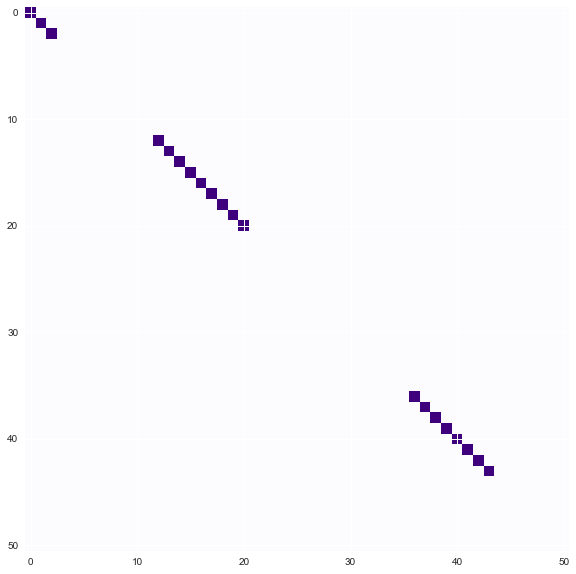

In [78]:
#from Bio import pairwise2
#from Bio import SeqIO
#from Bio.Seq import Seq
def make_quick_plot(window):
    import matplotlib.pyplot as plt

    print 'window size: ' + str(window)
    plt.rcParams['figure.figsize'] = 10,10
    plt.imshow(dot_plot(sequence_1,sequence_2,complement=False,window=window),cmap="Purples_r",interpolation='none')
    plt.show()
for i in range(0,10):
    make_quick_plot(i)

window size: 0


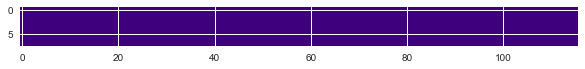

window size: 1


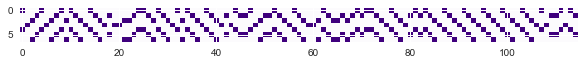

window size: 2


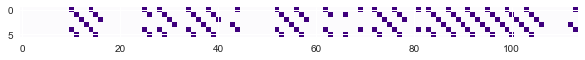

window size: 3


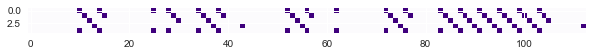

window size: 4


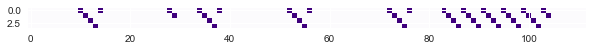

window size: 5


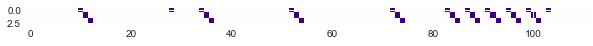

window size: 6


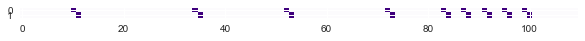

window size: 7


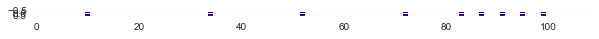

In [74]:
sequence_4 = 'gatcgatc'
sequence_3 = 'gctagctagtgatcgatcaccttaggatgatcgtgatcgatcacgaagctaagatcgatcctgattatagaggatcgatcagagatcgatcgatcgatcgatcgatcgcaagcgaa'
def make_quick_plot(window):
    import matplotlib.pyplot as plt

    print 'window size: ' + str(window)
    plt.rcParams['figure.figsize'] = 10,1
    plt.imshow(dot_plot(sequence_3,sequence_4,complement=False,window=window),cmap="Purples_r",interpolation='none')
    plt.show()
for i in range(0,8):
    make_quick_plot(i)

window size: 0


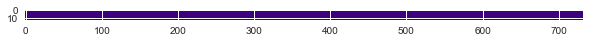

window size: 1


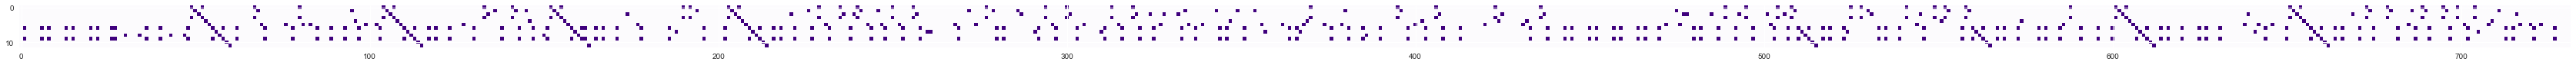

window size: 2


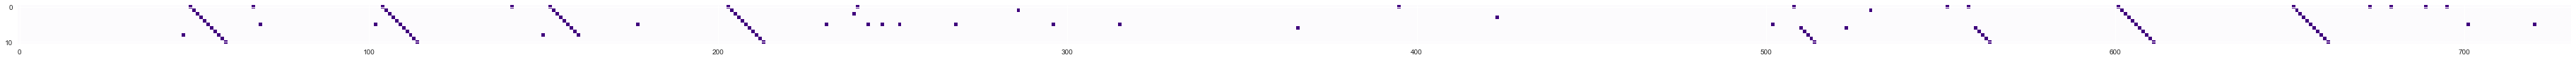

window size: 3


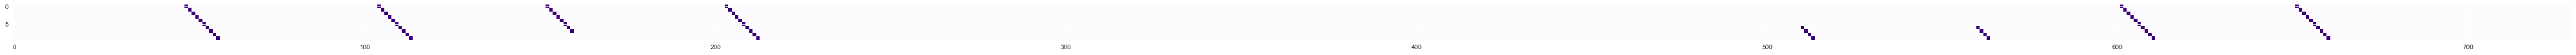

window size: 4


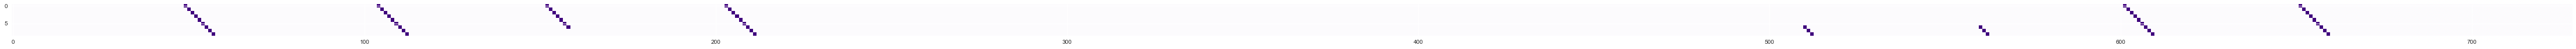

window size: 5


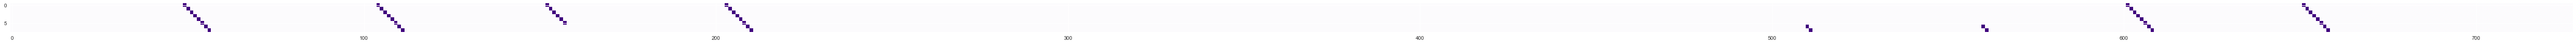

window size: 6


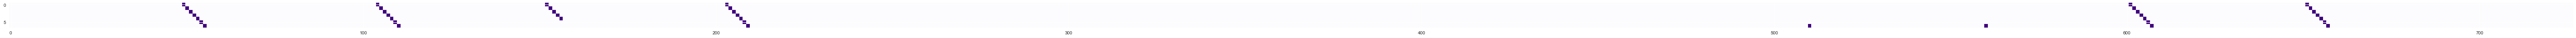

window size: 7


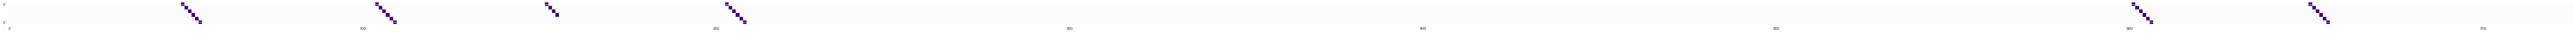

In [66]:
sequence_4 = 'inside my DNA'
sequence_3 = 'I got, I got, I got, I got  Loyalty, got royalty inside my DNA Cocaine quarter piece, got war and peace inside my DNA I got power, poison, pain and joy inside my  NA I got hustle though, ambition, flow, inside my DNA I was born like this, since one like this Immaculate conception I transform like this, perform like this Was Yeshuas new weapon I dont contemplate, I meditate, then off your fucking head This that put-the-kids-to-bed This that I got, I got, I got, I got Realness, I just kill shit cause its in my DNA I got millions, I got riches buildin’ in my DNA I got dark, I got evil, that rot inside my DNA I got off, I got troublesome, heart inside my DNA I just win again, then win again like Wimbledon, I serve Yeah, thats'
def make_quick_plot(window):
    import matplotlib.pyplot as plt

    print 'window size: ' + str(window)
    plt.imshow(dot_plot(sequence_3,sequence_4,complement=False,window=window),cmap="Purples_r",interpolation='none')
    plt.show()
    plt.rcParams['figure.figsize'] = 500,1
for i in range(0,8):
    make_quick_plot(i)

window size: 0


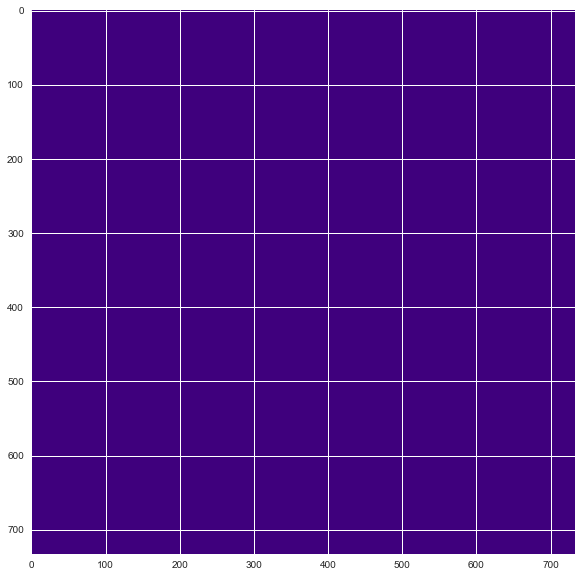

window size: 1


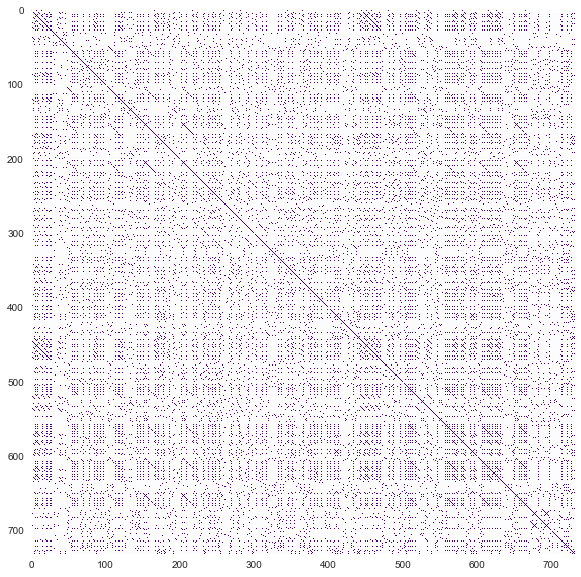

window size: 2


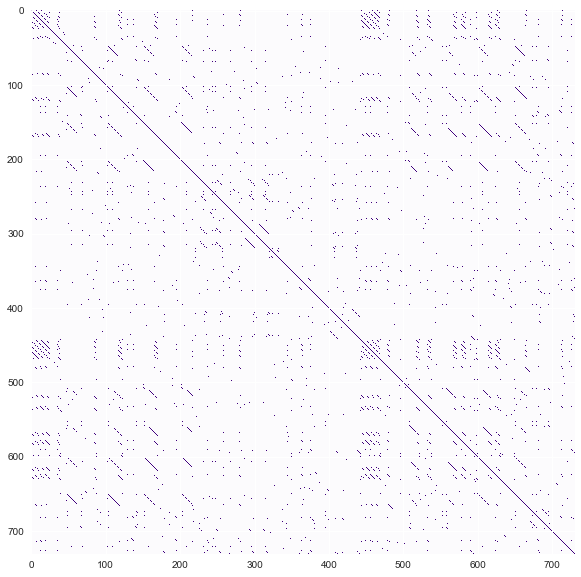

window size: 3


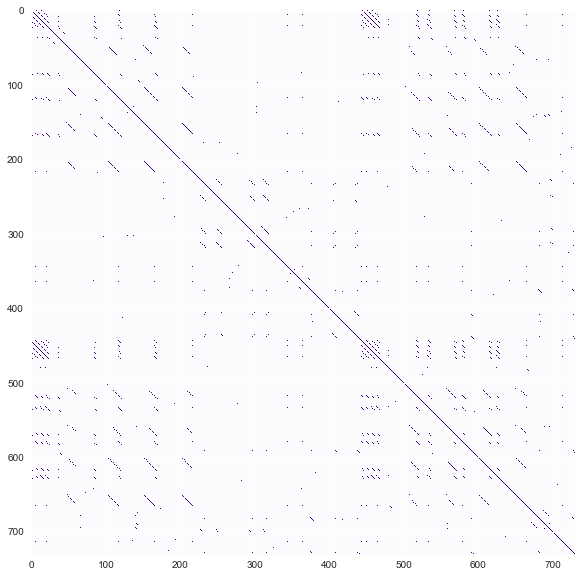

window size: 4


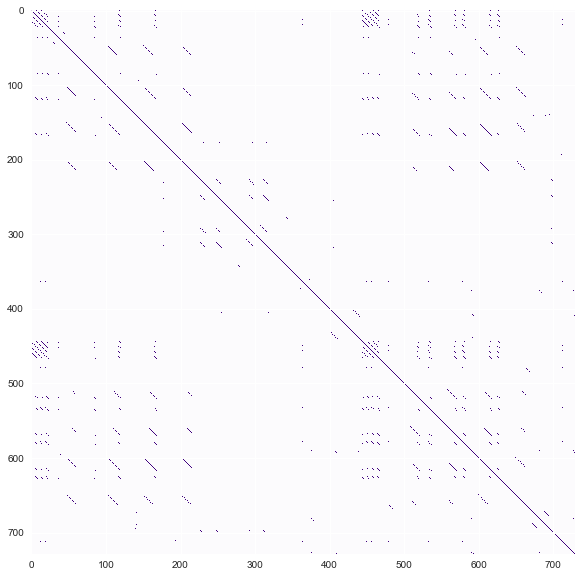

window size: 5


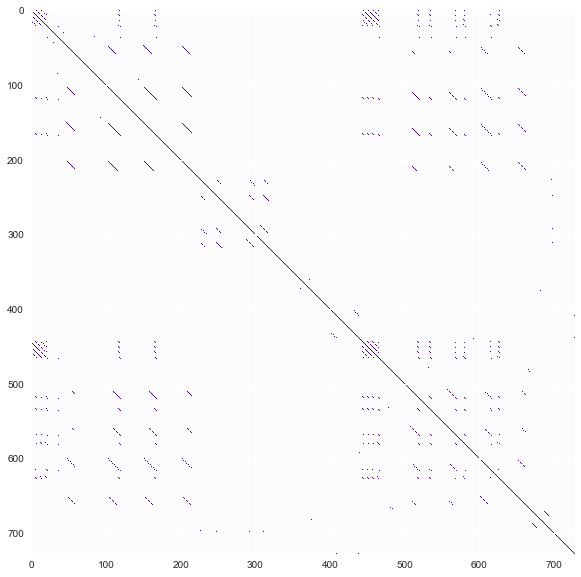

window size: 6


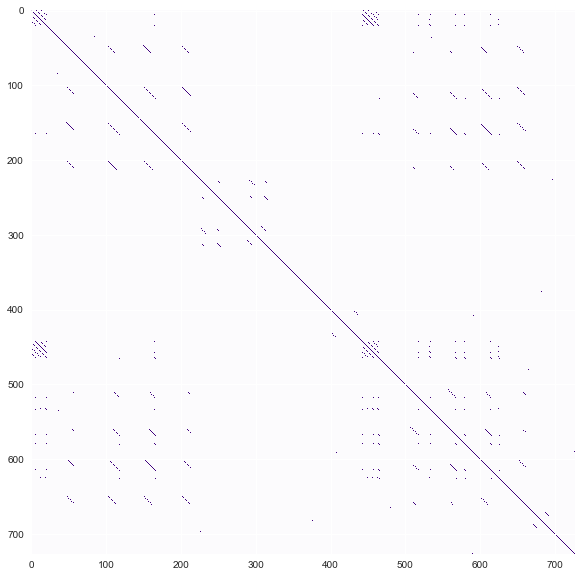

window size: 7


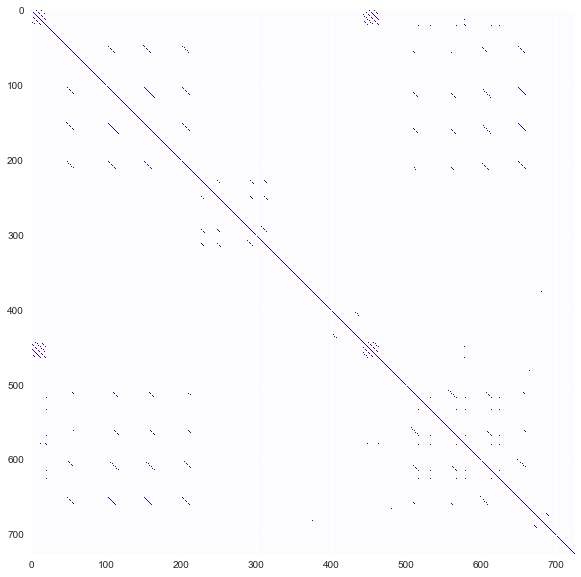

In [76]:
sequence_5 = 'I got, I got, I got, I got  Loyalty, got royalty inside my DNA Cocaine quarter piece, got war and peace inside my DNA I got power, poison, pain and joy inside my DNA I got hustle though, ambition, flow, inside my DNA I was born like this, since one like this Immaculate conception I transform like this, perform like this Was Yeshuas new weapon I dont contemplate, I meditate, then off your fucking head This that put-the-kids-to-bed This that I got, I got, I got, I got Realness, I just kill shit cause its in my DNA I got millions, I got riches buildin’ in my DNA I got dark, I got evil, that rot inside my DNA I got off, I got troublesome, heart inside my DNA I just win again, then win again like Wimbledon, I serve Yeah, thats'
sequence_6 = 'I got, I got, I got, I got  Loyalty, got royalty inside my DNA Cocaine quarter piece, got war and peace inside my DNA I got power, poison, pain and joy inside my DNA I got hustle though, ambition, flow, inside my DNA I was born like this, since one like this Immaculate conception I transform like this, perform like this Was Yeshuas new weapon I dont contemplate, I meditate, then off your fucking head This that put-the-kids-to-bed This that I got, I got, I got, I got Realness, I just kill shit cause its in my DNA I got millions, I got riches buildin’ in my DNA I got dark, I got evil, that rot inside my DNA I got off, I got troublesome, heart inside my DNA I just win again, then win again like Wimbledon, I serve Yeah, thats'
def make_quick_plot(window):
    import matplotlib.pyplot as plt

    print 'window size: ' + str(window)
    plt.rcParams['figure.figsize'] = 10,10
    plt.imshow(dot_plot(sequence_5,sequence_6,complement=False,window=window),cmap="Purples_r",interpolation='none')
    plt.show()
    
for i in range(0,8):
    make_quick_plot(i)

In [85]:
def count_mismatches(seq_A,seq_B):
    count = 0
    for i in range(0,len(seq_A)):
        if seq_A[i] == seq_B[i]:
            count += 1
    return count
def dot_plot_tolerant(seq_record,comparison_sequence,complement=True,window=3):
    #subject_strand = str(seq_record.seq).upper()
    subject_strand = seq_record
    #seq_two = str(comparison_sequence).upper()
    seq_two = comparison_sequence
    #seq_two_complement = str(comparison_sequence.complement).upper()
    data = np.array([[count_mismatches(subject_strand[i:i + window], seq_two[j:j + window])
                       for i in range(len(subject_strand) - window)]
                      for j in range(len(seq_two) - window)])
    if complement==True:
        data = data + np.array([[2 * int((subject_strand[i:i + window] != seq_two_complement[j:j + window]))
                               for i in range(len(subject_strand) - window)]
                              for j in range(len(seq_two) - window)])
    print data
    return data

window size: 1
[[1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 1]]


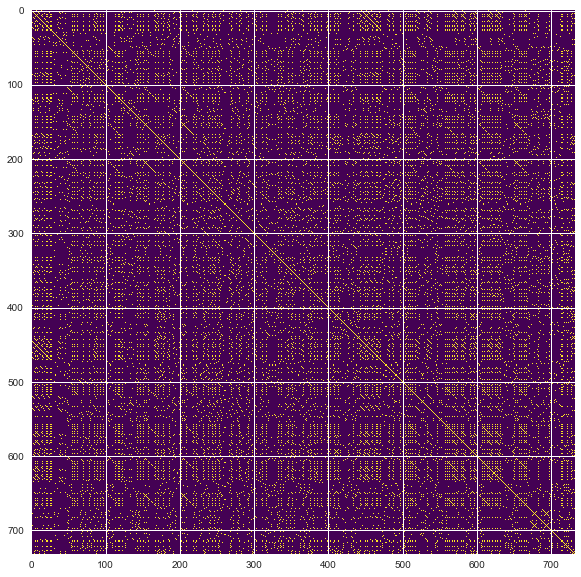

window size: 2
[[2 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 2 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 2 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 2]]


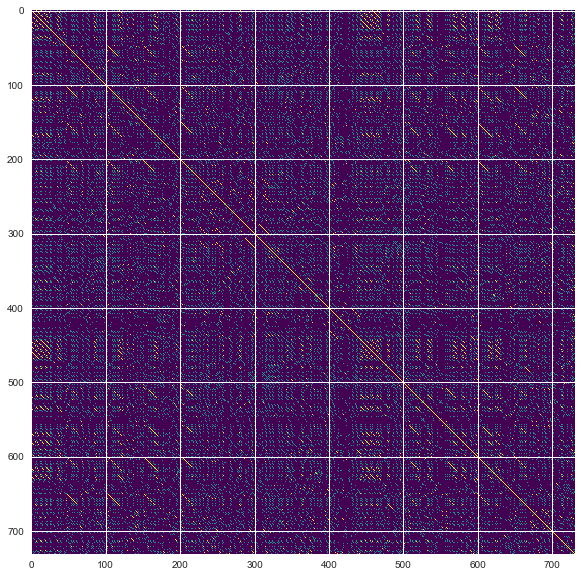

window size: 3
[[3 0 0 ..., 0 0 0]
 [0 3 0 ..., 1 0 0]
 [0 0 3 ..., 0 0 1]
 ..., 
 [0 1 0 ..., 3 0 0]
 [0 0 0 ..., 0 3 0]
 [0 0 1 ..., 0 0 3]]


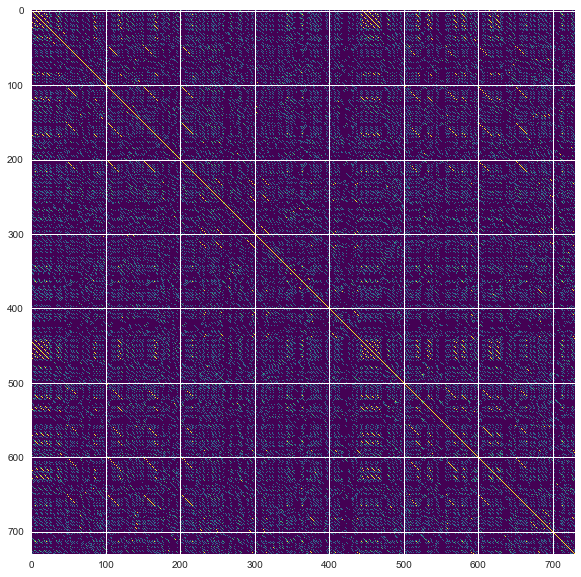

window size: 4
[[4 0 0 ..., 1 0 0]
 [0 4 0 ..., 0 1 1]
 [0 0 4 ..., 1 0 0]
 ..., 
 [1 0 1 ..., 4 0 0]
 [0 1 0 ..., 0 4 0]
 [0 1 0 ..., 0 0 4]]


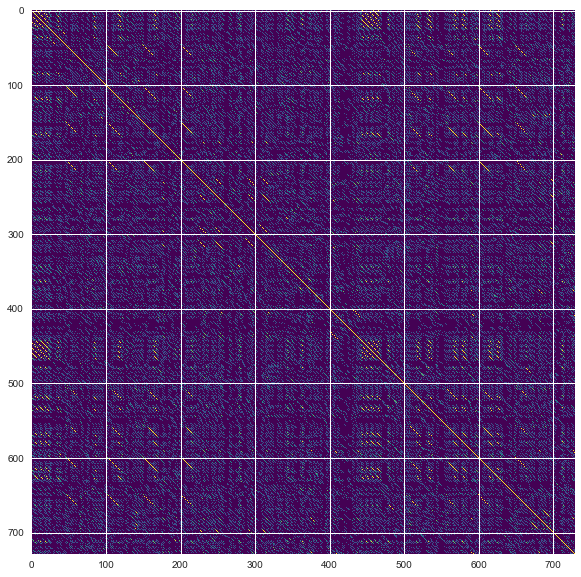

window size: 5
[[5 0 0 ..., 0 1 1]
 [0 5 0 ..., 1 0 1]
 [0 0 5 ..., 0 1 0]
 ..., 
 [0 1 0 ..., 5 0 0]
 [1 0 1 ..., 0 5 0]
 [1 1 0 ..., 0 0 5]]


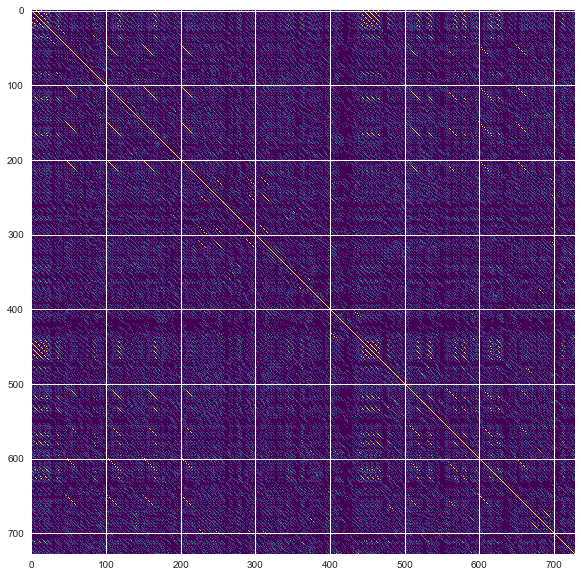

window size: 6
[[6 0 0 ..., 1 0 1]
 [0 6 0 ..., 0 1 0]
 [0 0 6 ..., 0 0 1]
 ..., 
 [1 0 0 ..., 6 0 0]
 [0 1 0 ..., 0 6 0]
 [1 0 1 ..., 0 0 6]]


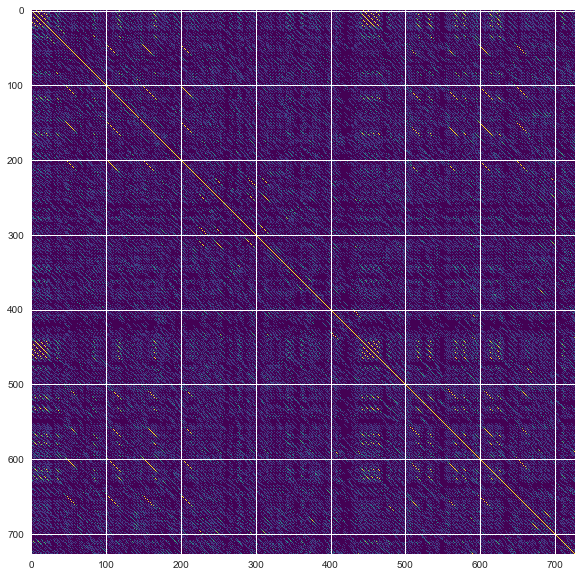

window size: 7
[[7 0 1 ..., 0 1 0]
 [0 7 0 ..., 0 0 1]
 [1 0 7 ..., 2 0 0]
 ..., 
 [0 0 2 ..., 7 0 0]
 [1 0 0 ..., 0 7 0]
 [0 1 0 ..., 0 0 7]]


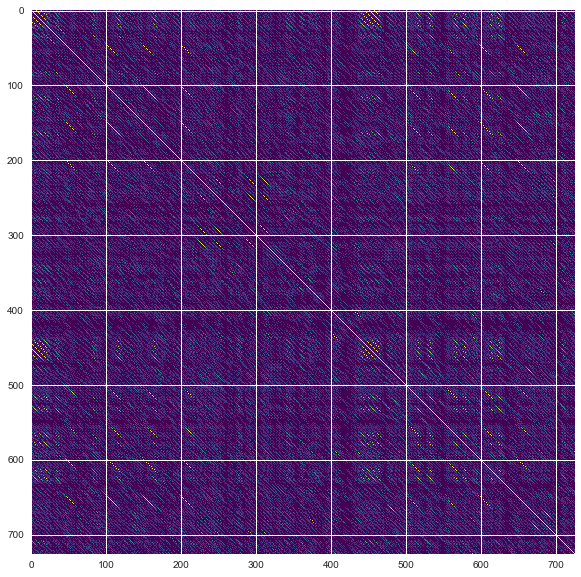

window size: 8
[[8 0 1 ..., 0 0 1]
 [0 8 0 ..., 2 0 0]
 [1 0 8 ..., 0 2 0]
 ..., 
 [0 2 0 ..., 8 0 0]
 [0 0 2 ..., 0 8 0]
 [1 0 0 ..., 0 0 8]]


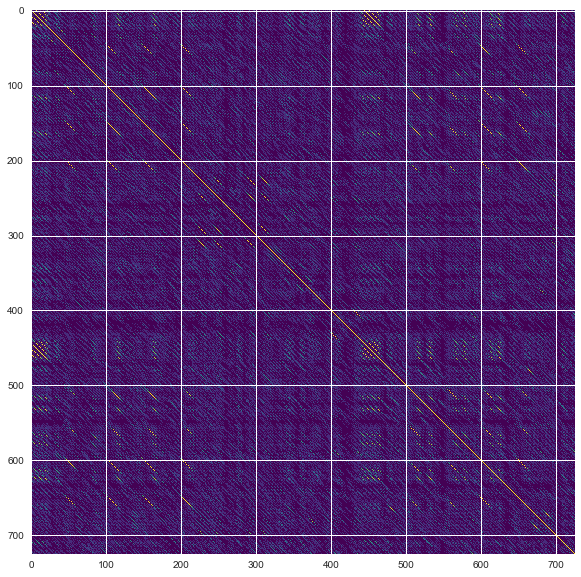

window size: 9
[[9 0 1 ..., 2 0 0]
 [0 9 0 ..., 1 2 0]
 [1 0 9 ..., 1 0 2]
 ..., 
 [2 1 1 ..., 9 0 0]
 [0 2 0 ..., 0 9 0]
 [0 0 2 ..., 0 0 9]]


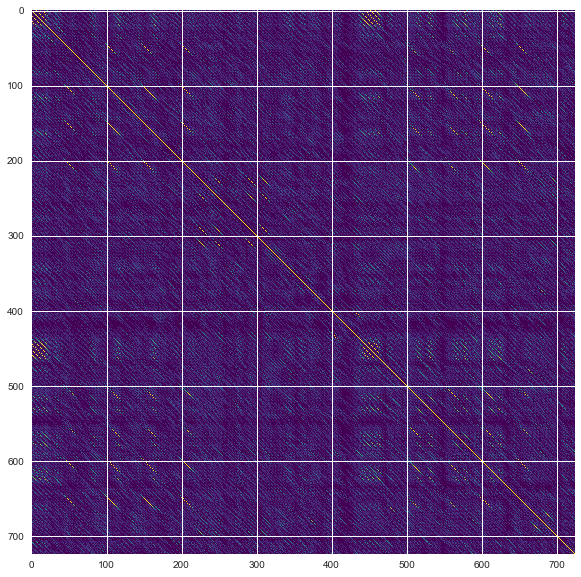

window size: 10
[[10  0  1 ...,  1  2  0]
 [ 0 10  0 ...,  1  1  2]
 [ 1  0 10 ...,  0  1  1]
 ..., 
 [ 1  1  0 ..., 10  0  0]
 [ 2  1  1 ...,  0 10  0]
 [ 0  2  1 ...,  0  0 10]]


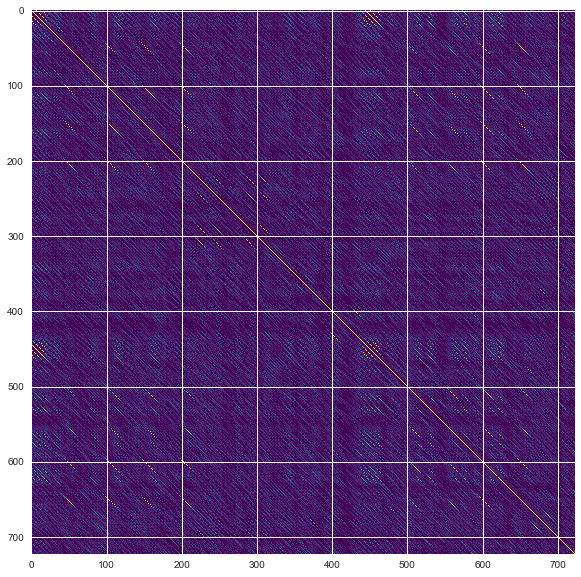

window size: 11
[[11  0  1 ...,  1  1  2]
 [ 0 11  0 ...,  0  1  2]
 [ 1  0 11 ...,  1  0  1]
 ..., 
 [ 1  0  1 ..., 11  0  0]
 [ 1  1  0 ...,  0 11  0]
 [ 2  2  1 ...,  0  0 11]]


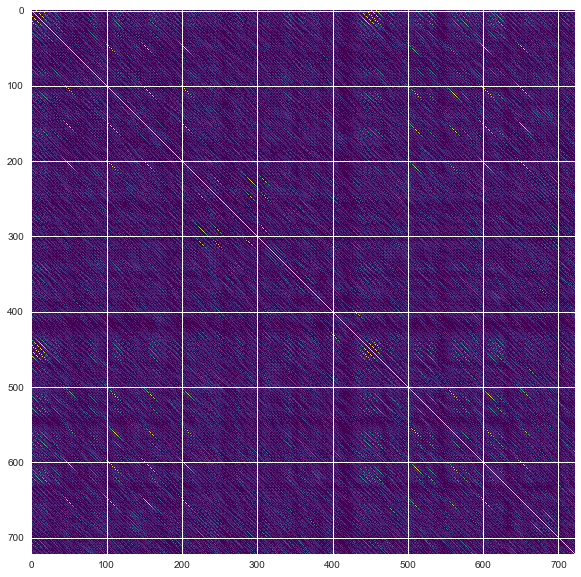

window size: 12
[[12  0  1 ...,  0  1  2]
 [ 0 12  0 ...,  1  0  1]
 [ 1  0 12 ...,  0  1  0]
 ..., 
 [ 0  1  0 ..., 12  0  0]
 [ 1  0  1 ...,  0 12  0]
 [ 2  1  0 ...,  0  0 12]]


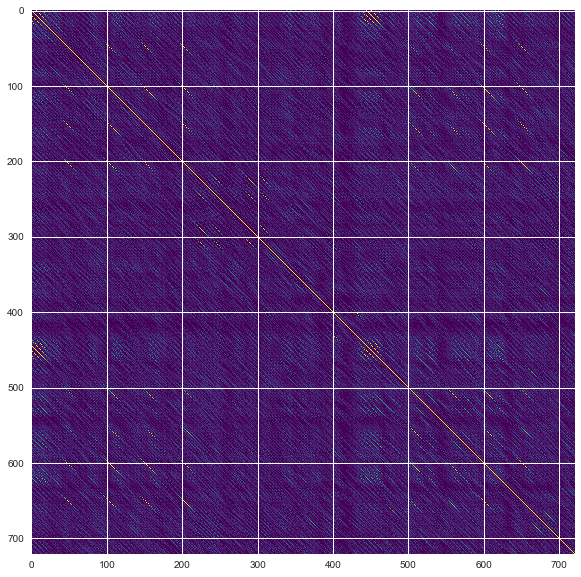

window size: 13
[[13  0  1 ...,  1  0  1]
 [ 0 13  0 ...,  0  1  0]
 [ 1  0 13 ...,  1  0  1]
 ..., 
 [ 1  0  1 ..., 13  0  0]
 [ 0  1  0 ...,  0 13  0]
 [ 1  0  1 ...,  0  0 13]]


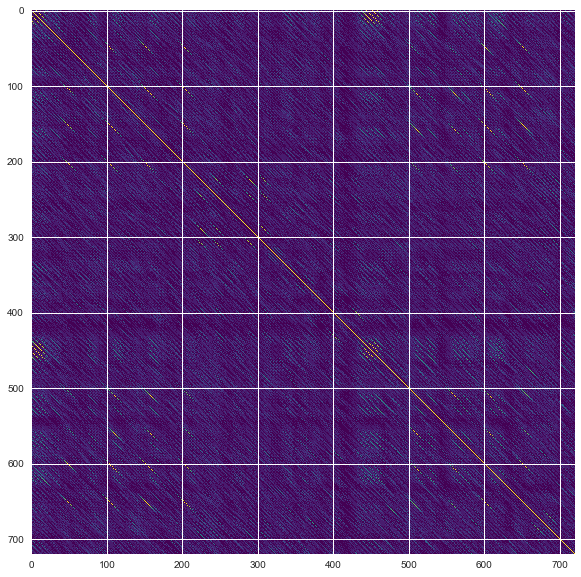

window size: 14
[[14  0  2 ...,  0  1  0]
 [ 0 14  0 ...,  1  0  1]
 [ 2  0 14 ...,  2  1  0]
 ..., 
 [ 0  1  2 ..., 14  0  0]
 [ 1  0  1 ...,  0 14  0]
 [ 0  1  0 ...,  0  0 14]]


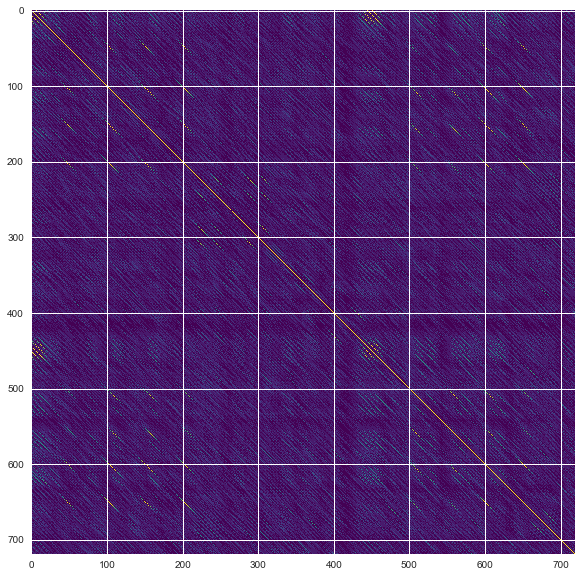

window size: 15
[[15  0  2 ...,  1  0  1]
 [ 0 15  0 ...,  3  1  0]
 [ 2  0 15 ...,  1  2  1]
 ..., 
 [ 1  3  1 ..., 15  0  0]
 [ 0  1  2 ...,  0 15  0]
 [ 1  0  1 ...,  0  0 15]]


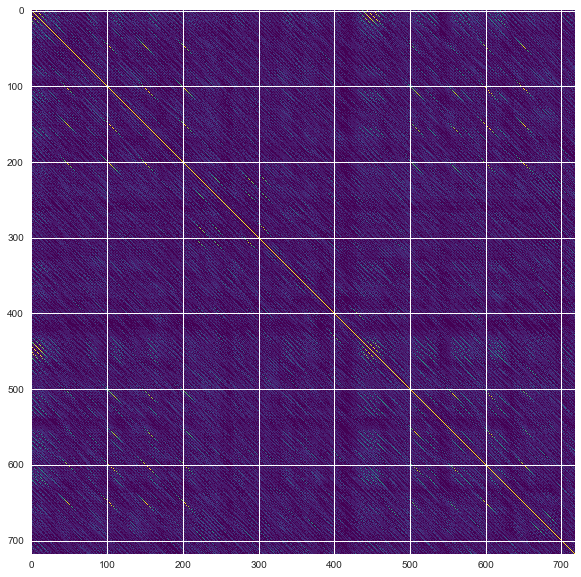

window size: 16
[[16  0  2 ...,  4  1  0]
 [ 0 16  0 ...,  1  3  1]
 [ 2  0 16 ...,  1  1  2]
 ..., 
 [ 4  1  1 ..., 16  0  0]
 [ 1  3  1 ...,  0 16  0]
 [ 0  1  2 ...,  0  0 16]]


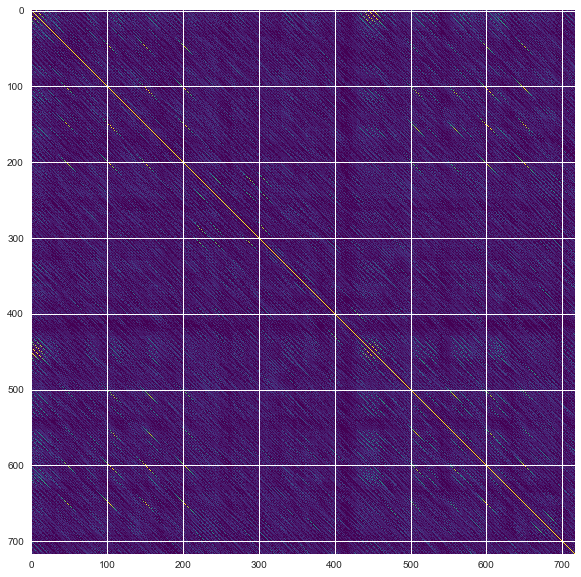

window size: 17
[[17  0  2 ...,  1  4  1]
 [ 0 17  0 ...,  2  1  3]
 [ 2  0 17 ...,  0  1  2]
 ..., 
 [ 1  2  0 ..., 17  0  1]
 [ 4  1  1 ...,  0 17  0]
 [ 1  3  2 ...,  1  0 17]]


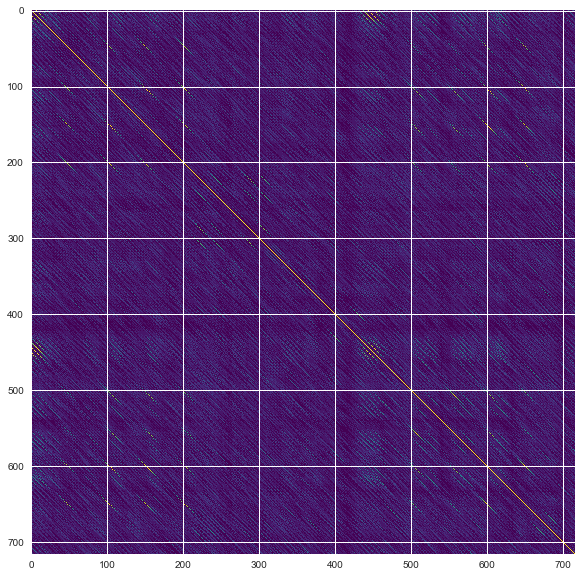

window size: 18
[[18  0  2 ...,  2  1  4]
 [ 0 18  0 ...,  0  2  2]
 [ 2  0 18 ...,  1  0  1]
 ..., 
 [ 2  0  1 ..., 18  0  1]
 [ 1  2  0 ...,  0 18  0]
 [ 4  2  1 ...,  1  0 18]]


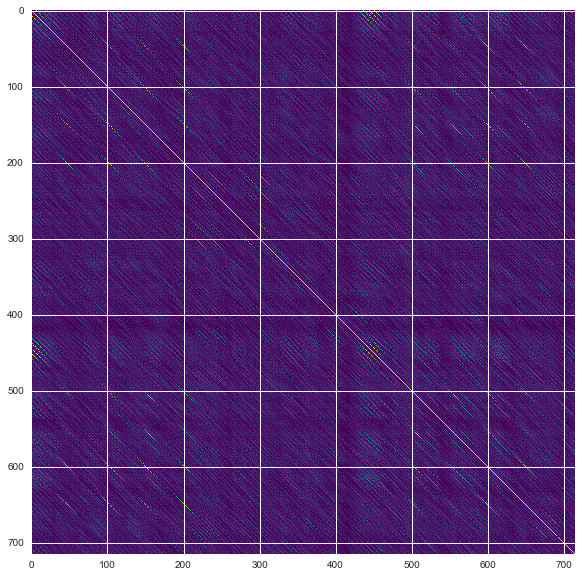

window size: 19
[[19  0  2 ...,  0  2  2]
 [ 0 19  0 ...,  1  0  2]
 [ 2  0 19 ...,  1  1  0]
 ..., 
 [ 0  1  1 ..., 19  0  1]
 [ 2  0  1 ...,  0 19  0]
 [ 2  2  0 ...,  1  0 19]]


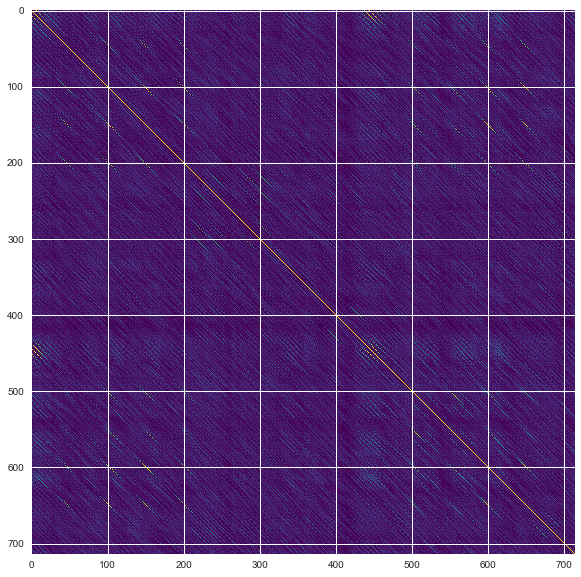

In [136]:
sequence_5 = 'I got, I got, I got, I got  Loyalty, got royalty inside my DNA Cocaine quarter piece, got war and peace inside my DNA I got power, poison, pain and joy inside my DNA I got hustle though, ambition, flow, inside my DNA I was born like this, since one like this Immaculate conception I transform like this, perform like this Was Yeshuas new weapon I dont contemplate, I meditate, then off your fucking head This that put-the-kids-to-bed This that I got, I got, I got, I got Realness, I just kill shit cause its in my DNA I got millions, I got riches buildin’ in my DNA I got dark, I got evil, that rot inside my DNA I got off, I got troublesome, heart inside my DNA I just win again, then win again like Wimbledon, I serve Yeah, thats'
sequence_6 = 'I got, I got, I got, I got  Loyalty, got royalty inside my DNA Cocaine quarter piece, got war and peace inside my DNA I got power, poison, pain and joy inside my DNA I got hustle though, ambition, flow, inside my DNA I was born like this, since one like this Immaculate conception I transform like this, perform like this Was Yeshuas new weapon I dont contemplate, I meditate, then off your fucking head This that put-the-kids-to-bed This that I got, I got, I got, I got Realness, I just kill shit cause its in my DNA I got millions, I got riches buildin’ in my DNA I got dark, I got evil, that rot inside my DNA I got off, I got troublesome, heart inside my DNA I just win again, then win again like Wimbledon, I serve Yeah, thats'
def make_quick_plot(window):
    import matplotlib.pyplot as plt


    print 'window size: ' + str(window)
    plt.rcParams['figure.figsize'] = 10,10
    plt.imshow(dot_plot_tolerant(sequence_5,sequence_6,complement=False,window=window),cmap="viridis",interpolation='none')
    plt.show()
    
for i in range(1,20):
    make_quick_plot(i)

window size: 15
[[15  1  2 ...,  0  7  1]
 [ 1 15  1 ...,  4  0  7]
 [ 2  1 15 ...,  4  3  0]
 ..., 
 [ 0  4  4 ..., 15  1  2]
 [ 7  0  3 ...,  1 15  1]
 [ 1  7  0 ...,  2  1 15]]


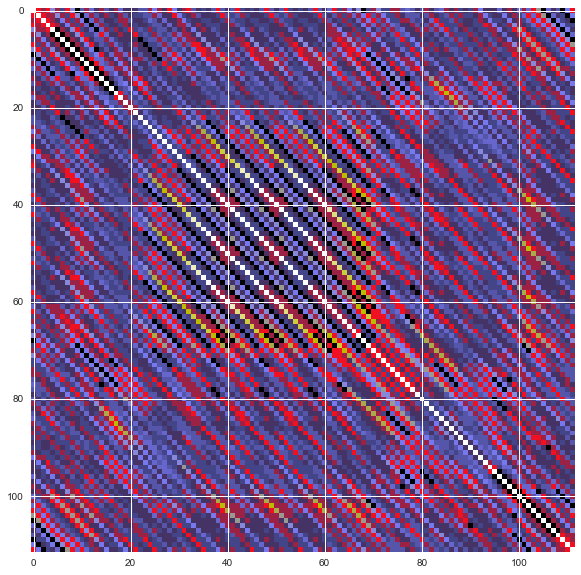

window size: 16
[[16  1  2 ...,  5  0  7]
 [ 1 16  1 ...,  4  4  0]
 [ 2  1 16 ...,  7  4  4]
 ..., 
 [ 5  4  7 ..., 16  1  2]
 [ 0  4  4 ...,  1 16  1]
 [ 7  0  4 ...,  2  1 16]]


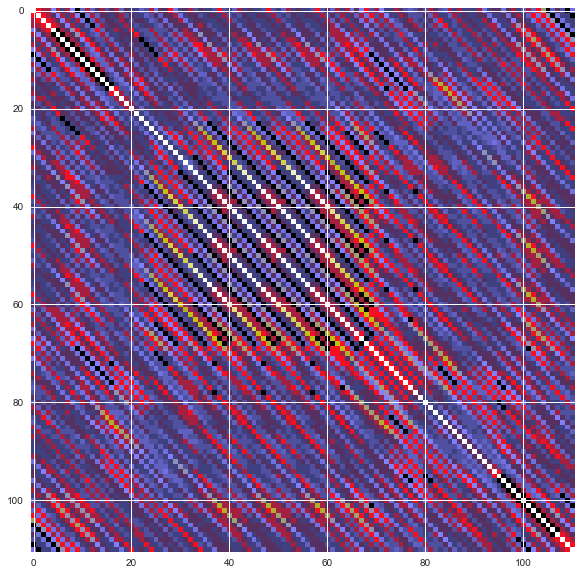

window size: 17
[[17  1  2 ...,  4  5  0]
 [ 1 17  1 ...,  7  4  5]
 [ 2  1 17 ...,  0  7  4]
 ..., 
 [ 4  7  0 ..., 17  1  2]
 [ 5  4  7 ...,  1 17  1]
 [ 0  5  4 ...,  2  1 17]]


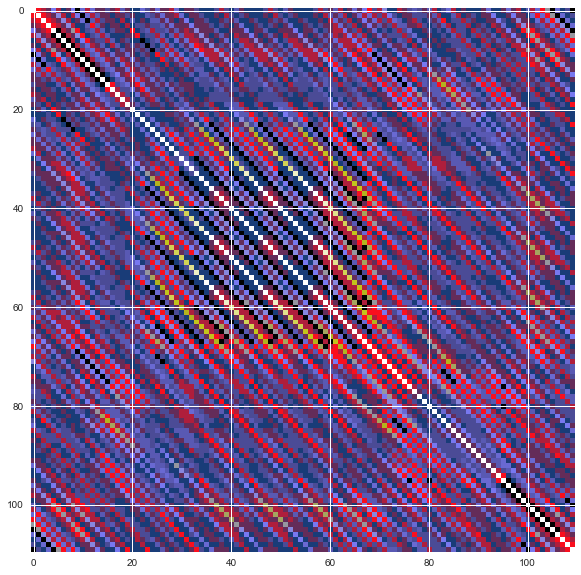

window size: 18
[[18  1  2 ...,  7  4  6]
 [ 1 18  1 ...,  0  7  4]
 [ 2  1 18 ..., 10  0  7]
 ..., 
 [ 7  0 10 ..., 18  1  2]
 [ 4  7  0 ...,  1 18  1]
 [ 6  4  7 ...,  2  1 18]]


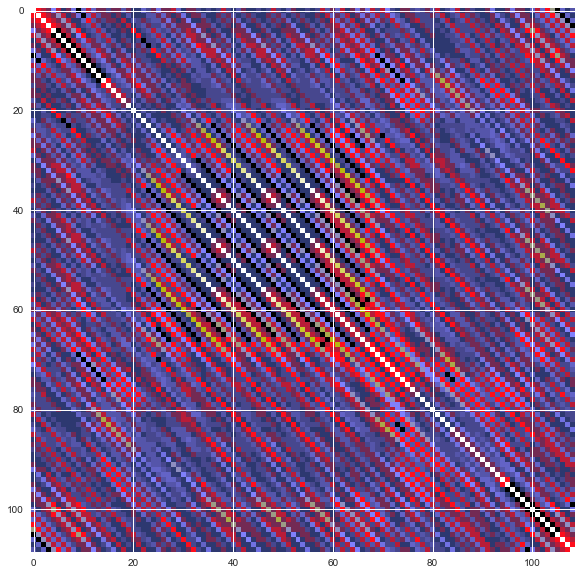

window size: 19
[[19  1  2 ...,  0  7  4]
 [ 1 19  1 ..., 11  0  7]
 [ 2  1 19 ...,  2 11  0]
 ..., 
 [ 0 11  2 ..., 19  1  2]
 [ 7  0 11 ...,  1 19  1]
 [ 4  7  0 ...,  2  1 19]]


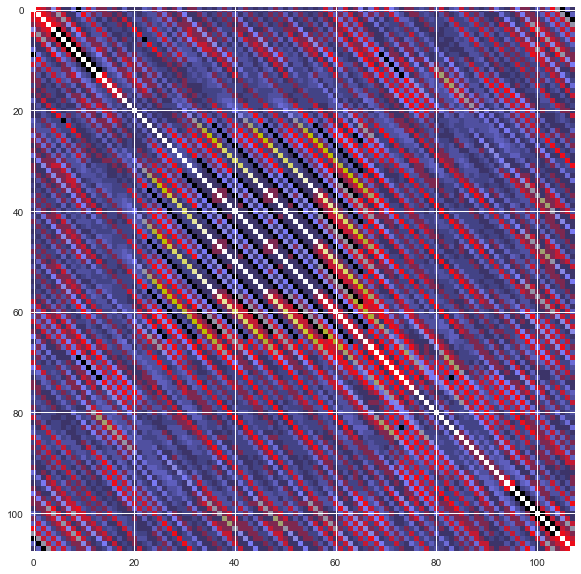

In [131]:
sequence_7 = 'cgattgactgagcgactgctagctactatataaagccctatcgatccctatcgatccctatcgatccctatcgatagcgatagccgatagcgaaaatatatcatcgatcgtcagcgagtcagttagc'
sequence_8 = 'cgattgactgagcgactgctagctactatataaagccctatcgatccctatcgatccctatcgatccctatcgatagcgatagccgatagcgaaaatatatcatcgatcgtcagcgagtcagttagc'

def make_quick_plot(window):
    import matplotlib.pyplot as plt


    print 'window size: ' + str(window)
    plt.rcParams['figure.figsize'] = 10,10
    plt.imshow(dot_plot_tolerant(sequence_7,sequence_8,complement=False,window=window),cmap="gist_stern",interpolation='none')
    plt.show()
    
for i in range(15,20):
    make_quick_plot(i)